<a href="https://colab.research.google.com/github/ARuizChang/NeuralNetworks/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST NN

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.ndimage import rotate, shift, zoom


In [ ]:
# Load and preprocess data
data = pd.read_csv('/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Normalize data
X = data[:, 1:] / 255.0
Y = data[:, 0].astype(np.int32)  # Convert to integers

# Split data into training and development sets
X_dev = X[:1000]
Y_dev = Y[:1000].astype(np.int32)  # Convert to integers
X_train = X[1000:]
Y_train = Y[1000:].astype(np.int32)  # Convert to integers


In [ ]:
Y_train

array([5, 8, 0, ..., 0, 1, 0], dtype=int32)

# Simple MNIST NN

## Neural Network Architecture
* Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image.
* Hidden layer $a^{[1]}$ will have 100 units with ReLU activation.
* Hidden layer $a^{[2]}$ will have 50 units with ReLU activation.
* Hidden layer $a^{[3]}$ will have 20 units with ReLU activation.
* Output layer $a^{[4]}$ will have 10 units with softmax activation.

## Forward Pass
$Z^{[1]} = W^{[1]} X + b^{[1]}$

$A^{[1]} = g_{\text{ReLU}}(Z^{[1]})$

$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$

$A^{[2]} = g_{\text{ReLU}}(Z^{[2]})$

$Z^{[3]} = W^{[3]} A^{[2]} + b^{[3]}$

$A^{[3]} = g_{\text{ReLU}}(Z^{[3]})$

$Z^{[4]} = W^{[4]} A^{[3]} + b^{[4]}$

$A^{[4]} = g_{\text{softmax}}(Z^{[4]})$

## Backward Propagation
$dZ^{[4]} = A^{[4]} - Y$

$dW^{[4]} = \frac{1}{m} dZ^{[4]} A^{[3]T}$

$dB^{[4]} = \frac{1}{m} \sum dZ^{[4]}$

$dZ^{[3]} = W^{[4]T} dZ^{[4]} \cdot g^{[3]\prime} (Z^{[3]})$

$dW^{[3]} = \frac{1}{m} dZ^{[3]} A^{[2]T}$

$dB^{[3]} = \frac{1}{m} \sum dZ^{[3]}$

$dZ^{[2]} = W^{[3]T} dZ^{[3]} \cdot g^{[2]\prime} (Z^{[2]})$

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

$dB^{[2]} = \frac{1}{m} \sum dZ^{[2]}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot g^{[1]\prime} (Z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \frac{1}{m} \sum dZ^{[1]}$

## Parameter Updates
$W^{[4]} := W^{[4]} - \alpha dW^{[4]}$

$b^{[4]} := b^{[4]} - \alpha db^{[4]}$

$W^{[3]} := W^{[3]} - \alpha dW^{[3]}$

$b^{[3]} := b^{[3]} - \alpha db^{[3]}$

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$b^{[2]} := b^{[2]} - \alpha db^{[2]}$

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$b^{[1]} := b^{[1]} - \alpha db^{[1]}$

## ReLU
$F(x) = \max(0, x)$

## Softmax
$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

## Variables and Shapes

### Forward Pass
* $A^{[0]} = X$: 784 x m
* $Z^{[1]} \sim A^{[1]}$: 100 x m
* $W^{[1]}$: 100 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
* $b^{[1]}$: 100 x 1
* $Z^{[2]} \sim A^{[2]}$: 50 x m
* $W^{[2]}$: 50 x 100 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
* $b^{[2]}$: 50 x 1
* $Z^{[3]} \sim A^{[3]}$: 20 x m
* $W^{[3]}$: 20 x 50 (as $W^{[3]} A^{[2]} \sim Z^{[3]}$)
* $b^{[3]}$: 20 x 1
* $Z^{[4]} \sim A^{[4]}$: 10 x m
* $W^{[4]}$: 10 x 20 (as $W^{[4]} A^{[3]} \sim Z^{[4]}$)
* $b^{[4]}$: 10 x 1

### Backpropagation
* $dZ^{[4]}$: 10 x m ($\sim A^{[4]}$)
* $dW^{[4]}$: 10 x 20
* $dB^{[4]}$: 10 x 1
* $dZ^{[3]}$: 20 x m ($\sim A^{[3]}$)
* $dW^{[3]}$: 20 x 50
* $dB^{[3]}$: 20 x 1
* $dZ^{[2]}$: 50 x m ($\sim A^{[2]}$)
* $dW^{[2]}$: 50 x 100
* $dB^{[2]}$: 50 x 1
* $dZ^{[1]}$: 100 x m ($\sim A^{[1]}$)
* $dW^{[1]}$: 100 x 784
* $dB^{[1]}$: 100 x 1

# Adam Optimizer

Initialize the first moment vector $m$ and the second moment vector $v$ to zero:
$$m_0 = 0, \quad v_0 = 0$$

At each time step $t$, compute the gradients $g_t$ of the loss function with respect to the parameters:
$$g_t = \nabla_{\theta} J(\theta_t)$$

Update the biased first moment estimate:
$$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$

Update the biased second moment estimate:
$$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$$

Compute bias-corrected first moment estimate:
$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$

Compute bias-corrected second moment estimate:
$$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

Update the parameters:
$$\theta_t = \theta_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

### Parameters:
- $\alpha$: Learning rate (default is 0.001)
- $\beta_1$: Exponential decay rate for the first moment estimates (default is 0.9)
- $\beta_2$: Exponential decay rate for the second moment estimates (default is 0.999)
- $\epsilon$: Small constant for numerical stability (default is 1e-8)

In [ ]:

# One-hot encode labels
def one_hot(Y):
    num_classes = int(np.max(Y)) + 1
    one_hot_Y = np.zeros((Y.shape[0], num_classes))  # Change to 2D
    one_hot_Y[np.arange(Y.shape[0]), Y.astype(np.int32)] = 1
    return one_hot_Y.T  # Transpose to get shape (num_classes, m)

# Before training
Y_train = one_hot(Y_train)
Y_dev = one_hot(Y_dev)

def random_rotation(image, angle_range=(-15, 15)):
    angle = float(np.random.uniform(angle_range[0], angle_range[1]))
    rotated_image = rotate(image, angle, reshape=False)
    return rotated_image

def random_shift(image, shift_range=(-2, 2)):
    shift_values = [float(np.random.uniform(shift_range[0], shift_range[1])) for _ in range(2)]
    shifted_image = shift(image, shift_values)
    return shifted_image

def random_zoom(image, zoom_range=(0.9, 1.1)):
    zoom_factor = float(np.random.uniform(zoom_range[0], zoom_range[1]))
    zoomed_image = zoom(image, zoom_factor)
    return zoomed_image

def resize_image(image, shape=(28, 28)):
    resized_image = zoom(image, (shape[0] / image.shape[0], shape[1] / image.shape[1]))
    return resized_image

def augment_image(image):
    image = image.reshape(28, 28)
    image = random_rotation(image)
    image = resize_image(image, (28, 28))
    image = random_shift(image)
    image = resize_image(image, (28, 28))
    image = random_zoom(image)
    image = resize_image(image, (28, 28))
    return image.flatten()

def augment_data(X):
    augmented_X = np.zeros_like(X)
    for i in range(X.shape[0]):
        augmented_X[i] = augment_image(X[i])
    return augmented_X

# Augment training data
X_train_augmented = augment_data(X_train)

# Initialize parameters
def init_params():
    W1 = np.random.rand(100, 784) - 0.5
    b1 = np.random.rand(100, 1) - 0.5
    W2 = np.random.rand(50, 100) - 0.5
    b2 = np.random.rand(50, 1) - 0.5
    W3 = np.random.rand(20, 50) - 0.5
    b3 = np.random.rand(20, 1) - 0.5
    W4 = np.random.rand(10, 20) - 0.5
    b4 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3, W4, b4

# ReLU activation function
def ReLU(Z):
    return np.maximum(0, Z)

# Softmax activation function
def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=0, keepdims=True)

# Dropout function
def dropout(A, keep_prob):
    D = np.random.rand(A.shape[0], A.shape[1]) < keep_prob
    A = A * D
    A = A / keep_prob
    return A, D

# Forward pass with dropout
def forward_pass(X, W1, b1, W2, b2, W3, b3, W4, b4, keep_prob=0.8):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    A1, D1 = dropout(A1, keep_prob)

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    A2, D2 = dropout(A2, keep_prob)

    Z3 = W3.dot(A2) + b3
    A3 = ReLU(Z3)
    A3, D3 = dropout(A3, keep_prob)

    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)

    return Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4

# ReLU derivative
def ReLU_derivative(Z):
    return Z > 0

# Backward propagation with dropout
def backward_prop(X, Y, Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4, W2, W3, W4, keep_prob=0.8):
    m = Y.shape[1]
    dZ4 = A4 - Y
    dW4 = 1/m * dZ4.dot(A3.T)
    db4 = 1/m * np.sum(dZ4, axis=1, keepdims=True)

    dA3 = W4.T.dot(dZ4)
    dA3 = dA3 * D3
    dA3 = dA3 / keep_prob
    dZ3 = dA3 * ReLU_derivative(Z3)
    dW3 = 1/m * dZ3.dot(A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = W3.T.dot(dZ3)
    dA2 = dA2 * D2
    dA2 = dA2 / keep_prob
    dZ2 = dA2 * ReLU_derivative(Z2)
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dA1 = dA1 * D1
    dA1 = dA1 / keep_prob
    dZ1 = dA1 * ReLU_derivative(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3, dW4, db4

# Adam optimizer
def adam_optimizer(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha, beta1, beta2, epsilon, t, mW, mb, vW, vb):
    mW1, mW2, mW3, mW4 = mW
    mb1, mb2, mb3, mb4 = mb
    vW1, vW2, vW3, vW4 = vW
    vb1, vb2, vb3, vb4 = vb

    # Update biased first moment estimate
    mW1 = beta1 * mW1 + (1 - beta1) * dW1
    mb1 = beta1 * mb1 + (1 - beta1) * db1
    mW2 = beta1 * mW2 + (1 - beta1) * dW2
    mb2 = beta1 * mb2 + (1 - beta1) * db2
    mW3 = beta1 * mW3 + (1 - beta1) * dW3
    mb3 = beta1 * mb3 + (1 - beta1) * db3
    mW4 = beta1 * mW4 + (1 - beta1) * dW4
    mb4 = beta1 * mb4 + (1 - beta1) * db4

    # Update biased second moment estimate
    vW1 = beta2 * vW1 + (1 - beta2) * (dW1 ** 2)
    vb1 = beta2 * vb1 + (1 - beta2) * (db1 ** 2)
    vW2 = beta2 * vW2 + (1 - beta2) * (dW2 ** 2)
    vb2 = beta2 * vb2 + (1 - beta2) * (db2 ** 2)
    vW3 = beta2 * vW3 + (1 - beta2) * (dW3 ** 2)
    vb3 = beta2 * vb3 + (1 - beta2) * (db3 ** 2)
    vW4 = beta2 * vW4 + (1 - beta2) * (dW4 ** 2)
    vb4 = beta2 * vb4 + (1 - beta2) * (db4 ** 2)

    # Compute bias-corrected first moment estimate
    mW1_corr = mW1 / (1 - beta1 ** t)
    mb1_corr = mb1 / (1 - beta1 ** t)
    mW2_corr = mW2 / (1 - beta1 ** t)
    mb2_corr = mb2 / (1 - beta1 ** t)
    mW3_corr = mW3 / (1 - beta1 ** t)
    mb3_corr = mb3 / (1 - beta1 ** t)
    mW4_corr = mW4 / (1 - beta1 ** t)
    mb4_corr = mb4 / (1 - beta1 ** t)

    # Compute bias-corrected second moment estimate
    vW1_corr = vW1 / (1 - beta2 ** t)
    vb1_corr = vb1 / (1 - beta2 ** t)
    vW2_corr = vW2 / (1 - beta2 ** t)
    vb2_corr = vb2 / (1 - beta2 ** t)
    vW3_corr = vW3 / (1 - beta2 ** t)
    vb3_corr = vb3 / (1 - beta2 ** t)
    vW4_corr = vW4 / (1 - beta2 ** t)
    vb4_corr = vb4 / (1 - beta2 ** t)

    # Update parameters
    W1 -= alpha * mW1_corr / (np.sqrt(vW1_corr) + epsilon)
    b1 -= alpha * mb1_corr / (np.sqrt(vb1_corr) + epsilon)
    W2 -= alpha * mW2_corr / (np.sqrt(vW2_corr) + epsilon)
    b2 -= alpha * mb2_corr / (np.sqrt(vb2_corr) + epsilon)
    W3 -= alpha * mW3_corr / (np.sqrt(vW3_corr) + epsilon)
    b3 -= alpha * mb3_corr / (np.sqrt(vb3_corr) + epsilon)
    W4 -= alpha * mW4_corr / (np.sqrt(vW4_corr) + epsilon)
    b4 -= alpha * mb4_corr / (np.sqrt(vb4_corr) + epsilon)

    return W1, b1, W2, b2, W3, b3, W4, b4, mW, mb, vW, vb



In [ ]:
# Gradient descent with Adam optimizer and learning rate scheduling
def gradient_descent(X, Y, alpha, iterations, decay_rate=0.1, decay_step=100):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params()
    mW = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3), np.zeros_like(W4)]
    mb = [np.zeros_like(b1), np.zeros_like(b2), np.zeros_like(b3), np.zeros_like(b4)]
    vW = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3), np.zeros_like(W4)]
    vb = [np.zeros_like(b1), np.zeros_like(b2), np.zeros_like(b3), np.zeros_like(b4)]
    beta1, beta2, epsilon = 0.9, 0.999, 1e-8
    t = 0

    for i in range(iterations):
        t += 1
        Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4 = forward_pass(X.T, W1, b1, W2, b2, W3, b3, W4, b4)
        dW1, db1, dW2, db2, dW3, db3, dW4, db4 = backward_prop(X.T, Y, Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4, W2, W3, W4)
        W1, b1, W2, b2, W3, b3, W4, b4, mW, mb, vW, vb = adam_optimizer(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha, beta1, beta2, epsilon, t, mW, mb, vW, vb)

        # Learning rate scheduling
        if i % decay_step == 0 and i != 0:
            alpha = alpha * (1 / (1 + decay_rate * i))

        if i % 100 == 0:
            predictions = np.argmax(A4, axis=0)
            accuracy = np.mean(predictions == np.argmax(Y, axis=0))
            print(f"Iteration {i}, Accuracy: {accuracy}, Learning Rate: {alpha}")
    return W1, b1, W2, b2, W3, b3, W4, b4



In [ ]:
# Train the model
W1, b1, W2, b2, W3, b3, W4, b4 = gradient_descent(X_train_augmented, Y_train, alpha=0.10, iterations=1000)


Iteration 0, Accuracy: 0.10468292682926829, Learning Rate: 0.1


In [ ]:
# Evaluate the model
Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4 = forward_pass(X_dev.T, W1, b1, W2, b2, W3, b3, W4, b4, keep_prob=1.0)  # No dropout during evaluation
predictions = np.argmax(A4, axis=0)
accuracy = np.mean(predictions == np.argmax(Y_dev, axis=0))
print(f"Development set accuracy: {accuracy}")

def display_prediction(index):
    plt.imshow(X_dev[index].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {predictions[index]}, True Label: {np.argmax(Y_dev[:, index])}")
    plt.show()

Development set accuracy: 0.163


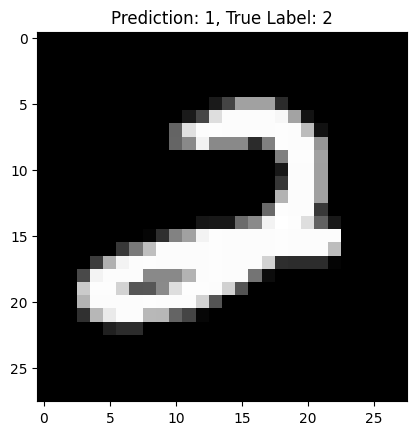

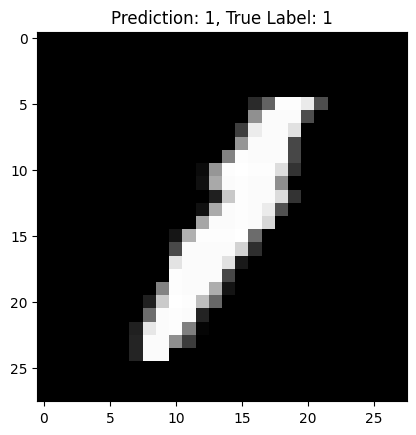

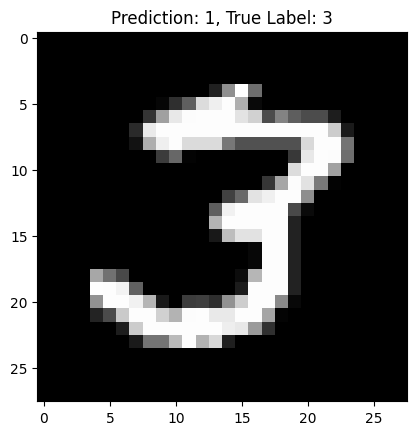

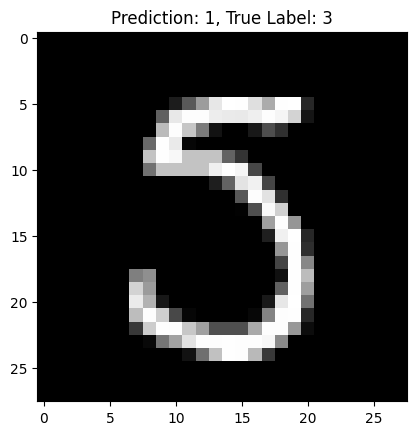

In [ ]:
display_prediction(0)
display_prediction(1)
display_prediction(2)
display_prediction(3)